In [37]:
import numpy as np
import pandas as pd
from root_pandas import read_root
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [18]:
# load data
df = read_root('../data/tmva3/Data2Pi.root')

In [19]:
df.columns.values

array(['MissMass2', 'MissMass', 'Topo', 'NPerm', 'NDet', 'Detector',
       'Correct', 'ElTime', 'ElEdep', 'ElDeltaE', 'ElPreE', 'ElP', 'ElTh',
       'ElPhi', 'ElVz', 'ElTrChi2', 'ElDet', 'PTime', 'PEdep', 'PDeltaE',
       'PPreE', 'PP', 'PTh', 'PPhi', 'PVz', 'PTrChi2', 'PDet', 'PipTime',
       'PipEdep', 'PipDeltaE', 'PipPreE', 'PipP', 'PipTh', 'PipPhi',
       'PipVz', 'PipTrChi2', 'PipDet', 'PimTime', 'PimEdep', 'PimDeltaE',
       'PimPreE', 'PimP', 'PimTh', 'PimPhi', 'PimVz', 'PimTrChi2',
       'PimDet', 'UID'], dtype=object)

In [20]:
# drop columns
pd.options.mode.use_inf_as_na = True
df.replace(np.inf, np.nan)
df = df.fillna(value = 0)

In [154]:
x = df.drop(['MissMass2', 'MissMass', 'Correct', 'UID'], axis=1).values
x = (x - x.min(0)) / x.ptp(0)

In [155]:
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=20, n_jobs=-4, max_iter = 1000, verbose=0).fit(x)

In [156]:
l =  kmeans.labels_

In [157]:
c = df['Correct'].values

(array([981560.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 191620.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

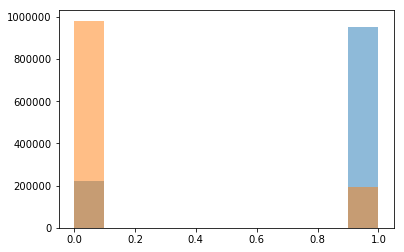

In [160]:
plt.hist(l, alpha = 0.5)
plt.hist(c, alpha = 0.5)

In [159]:
N = np.float64(c.shape)
acc = 1.0 - np.abs(c - (l)).sum()/N
acc

array([0.35120783])

In [73]:
np.abs(c - (l)).sum()/c.shape

array([0])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2eae9c5250>]],
      dtype=object)

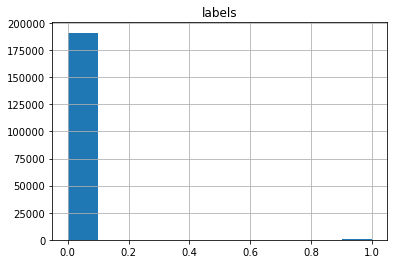

In [27]:
df[df['Correct']==1].hist('labels')